# Part II - Data Visualization of Ford Go-Bike System
## by Ebenezer Acquah

## Investigation Overview


> In this investigation, I perform univariate, bivariate, and multivariate analysis  on Ford Go-Bike system.  The main focus was to come up with a total of 15 visualizations from the dataset in order make deducations from the data.


## Dataset Overview

> This dataset provides information about individual rides made in a bike-sharing system in the San Francisco Bay Area. The dataset has 183412 rows and 16 columns.

In [36]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [37]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("/home/eben-success/Desktop/project_3_final/201902-fordgobike-tripdata.csv")

## Data Wrangling and Feature Engineering

In [38]:
for col in ['start_station_id', 'end_station_id', 'member_birth_year', 'member_gender' , 'end_station_name', 'start_station_name']:
    df[col] = df[col].fillna(df[col].mode()[0])
    
df['member_gender'] = df['member_gender'].fillna("Male")

In [39]:
# convert start_time and end_time to datetime format
df.start_time = pd.to_datetime(df. start_time)
df.end_time = pd.to_datetime(df.end_time)

# convert the start_station_id and end_stattion_id to strings
df.start_station_id = df.start_station_id.astype(str)

df.end_station_id = df.end_station_id.astype(str)

# convert the bike_id to string
df.bike_id = df.bike_id.astype(str)

# convert the user type and member_gender to categories
df.user_type = df.user_type.astype('category')

df.member_gender = df.member_gender.astype('category')

In [40]:
df['member_age'] = 2021 - df['member_birth_year']

# converting member age from float to int

df['member_age'] = df['member_age'].astype(int)

df.drop(columns=['member_birth_year'], inplace=True)

In [41]:
# Checking for ages abover 100 years
abnormal_ages = df.query('member_age > 100')
print("The number of members with ages greater than 100 are  ", abnormal_ages.shape[0])

The number of members with ages greater than 100 are   75


In [42]:
df = df[df['member_age'] < 100]

In [43]:
# Getting hours from start time
df['start_hour'] = df['start_time'] .dt.strftime('%H')

# Getting days from start time
df['start_day'] = df['start_time'] .dt.strftime('%A')

df['start_month'] = df['start_time'] .dt.strftime('%B')

In [44]:
df['duration_min'] = (df['duration_sec'] / 60)
df['duration_min'] = df['duration_min'].astype(int)

# Dropping the duration_sec columns

df.drop(['duration_sec'], axis=1, inplace=True)


In [45]:
df.head()

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,member_age,start_hour,start_day,start_month,duration_min
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,Male,No,37,17,Thursday,February,869
1,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,Male,No,33,18,Thursday,February,708
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,Male,No,49,12,Thursday,February,1030
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,Other,No,32,17,Thursday,February,608
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,Male,Yes,47,23,Thursday,February,26


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183337 entries, 0 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   start_time               183337 non-null  datetime64[ns]
 1   end_time                 183337 non-null  datetime64[ns]
 2   start_station_id         183337 non-null  object        
 3   start_station_name       183337 non-null  object        
 4   start_station_latitude   183337 non-null  float64       
 5   start_station_longitude  183337 non-null  float64       
 6   end_station_id           183337 non-null  object        
 7   end_station_name         183337 non-null  object        
 8   end_station_latitude     183337 non-null  float64       
 9   end_station_longitude    183337 non-null  float64       
 10  bike_id                  183337 non-null  object        
 11  user_type                183337 non-null  category      
 12  member_gender   

In [49]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['start_day'] = pd.Categorical(df['start_day'], categories=cats, ordered=True)
df = df.sort_values('start_day')
df.head()

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,member_age,start_hour,start_day,start_month,duration_min
82904,2019-02-18 08:44:12.542,2019-02-18 08:55:32.925,58.0,Market St at 10th St,37.776619,-122.417385,343.0,Bryant St at 2nd St,37.783172,-122.393572,5084,Subscriber,Male,No,26,08,Monday,February,11
79170,2019-02-18 17:59:16.315,2019-02-18 18:05:21.313,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,9.0,Broadway at Battery St,37.798572,-122.400869,1445,Subscriber,Male,No,51,17,Monday,February,6
79169,2019-02-18 17:58:58.405,2019-02-18 18:05:23.661,223.0,16th St Mission BART Station 2,37.764765,-122.420091,129.0,Harrison St at 20th St,37.758862,-122.412544,2105,Subscriber,Female,No,40,17,Monday,February,6
79168,2019-02-18 17:54:18.310,2019-02-18 18:05:26.655,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,114.0,Rhode Island St at 17th St,37.764478,-122.402570,5491,Subscriber,Male,No,43,17,Monday,February,11
79167,2019-02-18 18:01:32.113,2019-02-18 18:05:29.077,99.0,Folsom St at 15th St,37.767037,-122.415442,223.0,16th St Mission BART Station 2,37.764765,-122.420091,5032,Subscriber,Male,No,47,18,Monday,February,3


## Univariate Data Analysis

> In the univariate process, I answer the following questions through visualizations of bar graph, histogram, boxplot and violinplot.

- Which age group rented the most bikes?
- Which day has the most trips?
- Which duration range occurs the most frequently?
- Who are the major users of the bikes? (Customers or Subscribers)

Most people rented bikes on the Thursday. The total amount of bikes rented on the Thursday was 35000. This is followed by Tuesday, which amount a total of over 31000 rentals. On Friday,  a total amout of approximately 29000 rentals were made. The least of the rentals were made on Sunday and Saturday.

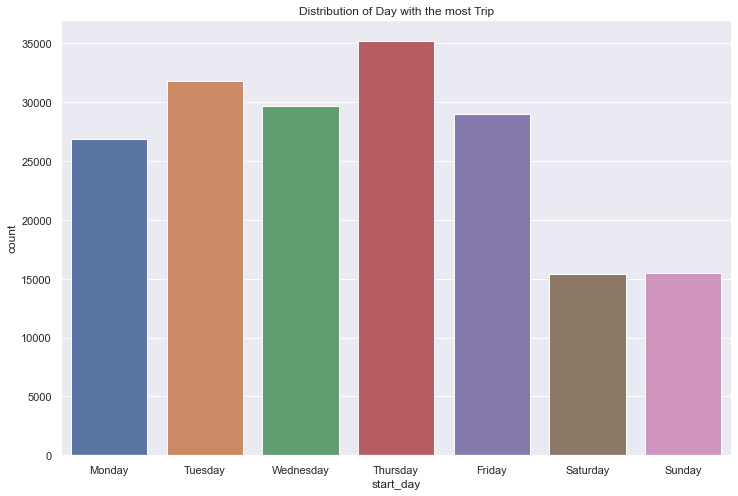

In [50]:
sn.set_theme(style='darkgrid')
plt.figure(figsize=[12,8])
plt.title('Distribution of Day with the most Trip')
sn.countplot(df['start_day']);

Both male and females age ranges have the same median age

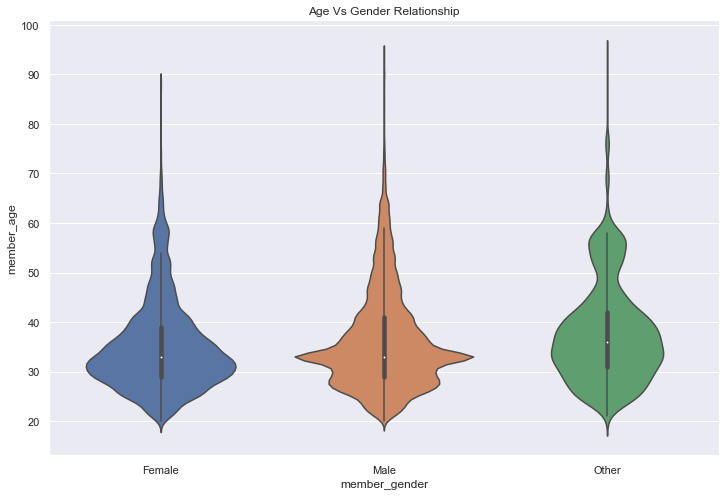

In [51]:
# Age range vs Gender

sn.set_theme(style='darkgrid')
plt.figure(figsize=(12,8))
plt.title("Age Vs Gender Relationship")
sn.violinplot(data=df, x='member_gender', y='member_age');

We can see that majority of the users are subscribers. They account to a little above

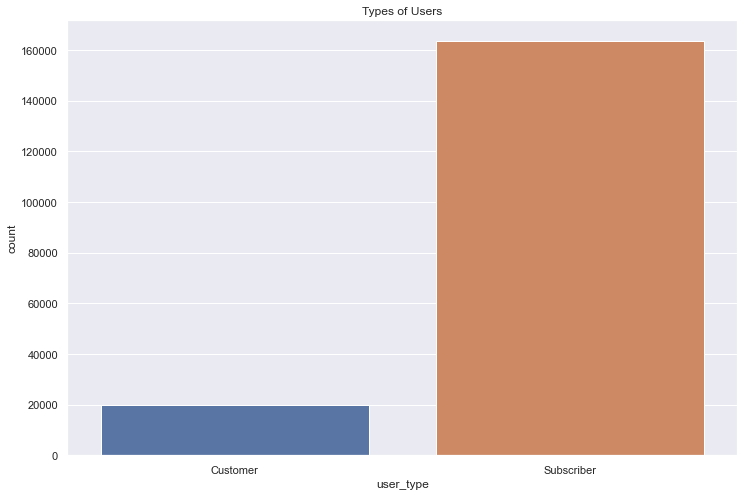

In [52]:
sn.set_theme(style='darkgrid')
plt.figure(figsize=[12,8])
plt.title("Types of Users")
sn.countplot(df.user_type);

## Bivariate Data Analysis

>Similarly, in the bivariate process, I answer the following questions through visualizations of bar graph, histogram, boxplot and violinplot.

- Which day of the week has the most average trips duration?
- Which the trip duration of each age group?
- What isthe age range of different user types?
- What is the age range of different genders?


it can be deduced that most people hire bikes on the weekends (Sunday and Saturday).

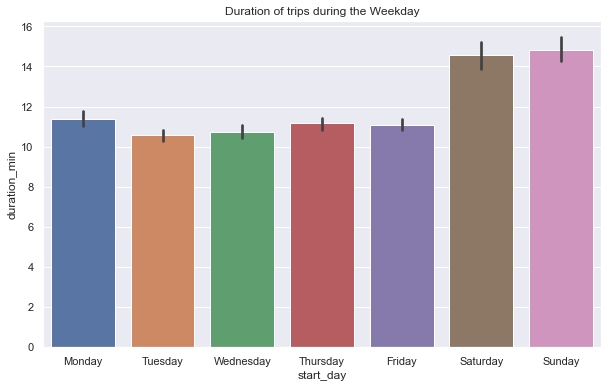

In [53]:
sn.set_theme(style='darkgrid')
plt.figure(figsize=[10,6])
plt.title("Duration of trips during the Weekday")
sn.barplot(data=df, x = 'start_day', y='duration_min');

Most age groups with largest average of trip duration are 21 and 77

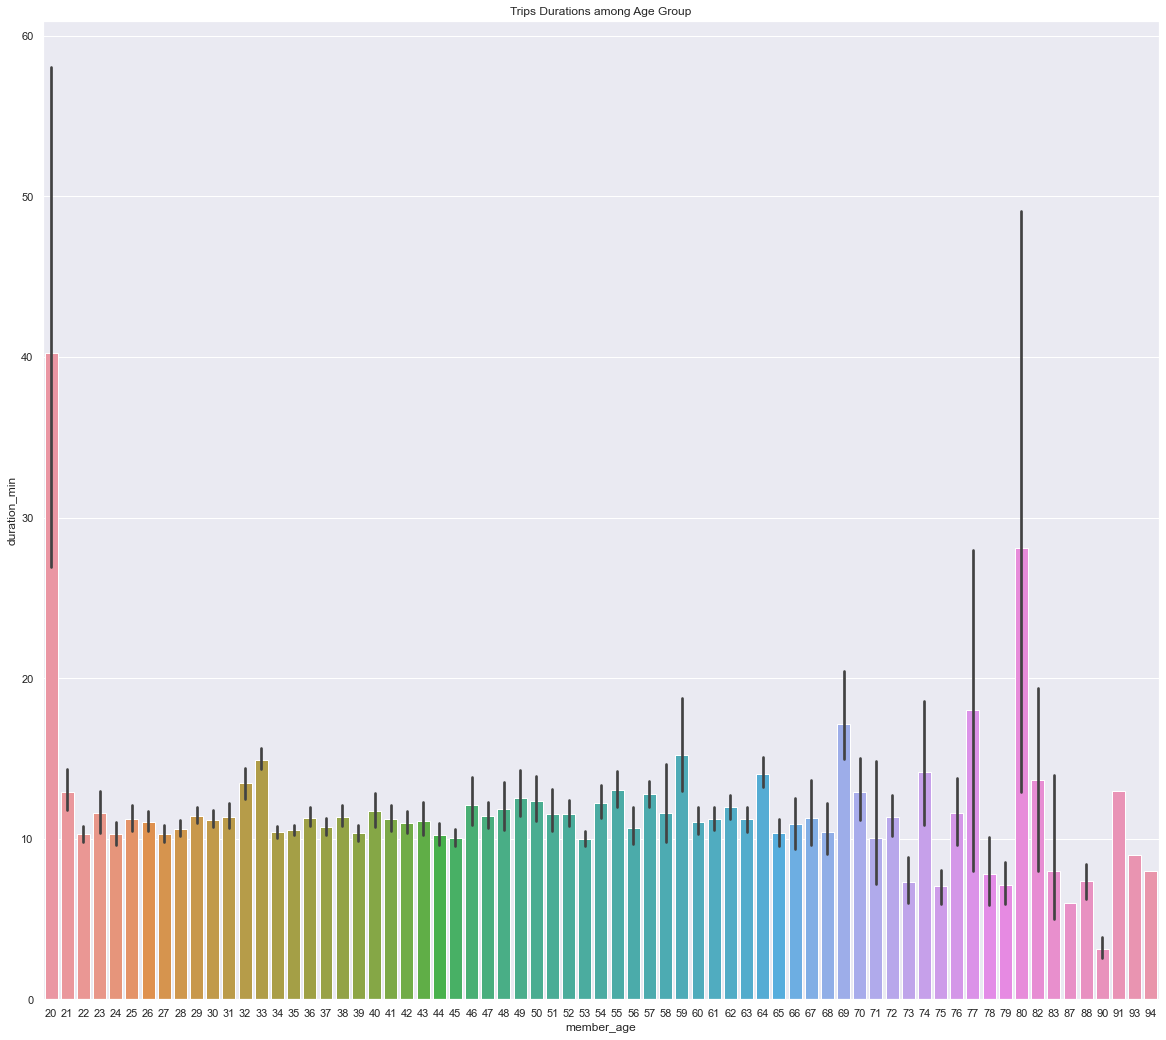

In [54]:
# Trip duration vs Age Group

sn.set_theme(style='darkgrid')
plt.figure(figsize=(20,18))
plt.title('Trips Durations among Age Group')
sn.barplot(data=df, x='member_age', y='duration_min');

Most the customers are between the ages of 30 and 39. While the age range of  majority of subscribers is 30 and 41 years. 

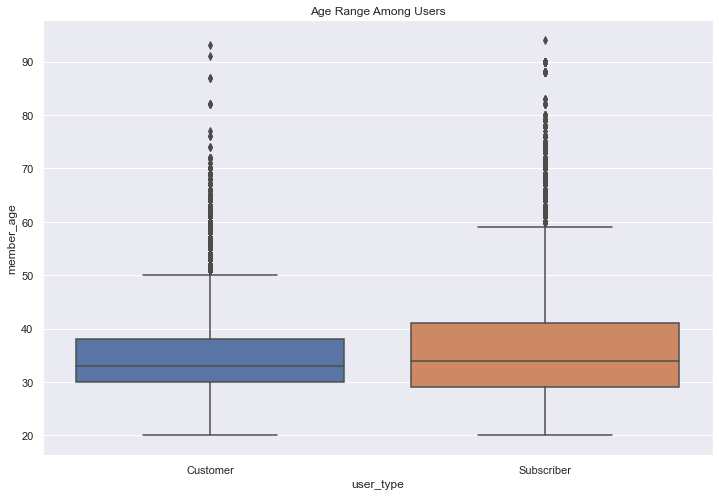

In [55]:
sn.set_theme(style='darkgrid')
plt.figure(figsize=(12,8))
plt.title("Age Range Among Users")
sn.boxplot(data=df, x='user_type', y='member_age');

## Multivariate Data Analysis
>Likewise, with the multivariate analysis, I found answers to the following questions through visualizations of bar graph, histogram, boxplot violinplot:
- What is the relationship between Weekdays, Average Duration and User Gender?
- Which gender have the most average trip duration among weekdays?
- Were there features that strengthened each other?
- Which user_type and member_gender took the most trip?



Most of the users who tok the rented the bikes from Monday to Sunday were males. 

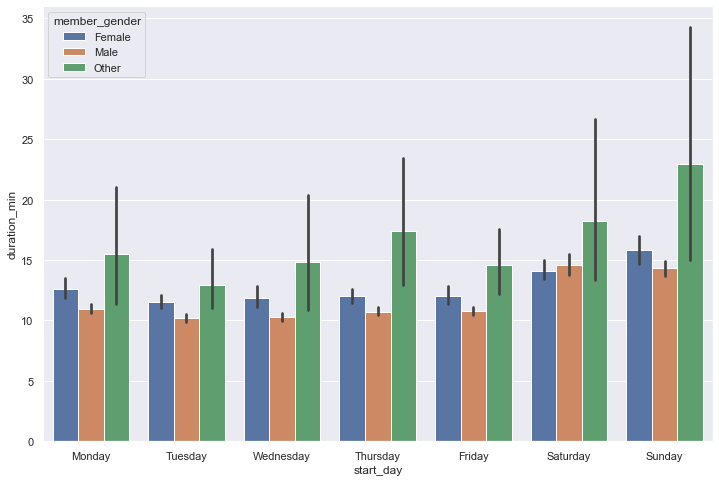

In [56]:
sn.set_theme(style='darkgrid')
plt.figure(figsize=(12,8))
sn.barplot(data=df, y='duration_min', x='start_day', hue='member_gender');

Both customer and subscribers show similar trends for age and trip duration. However, there is a slight increase in that of the subscribers.

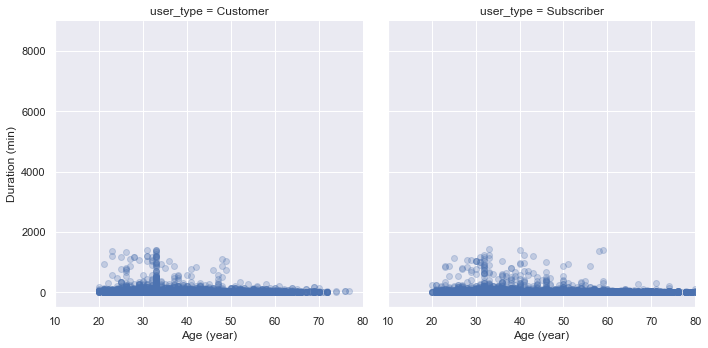

In [57]:
user_types = sn.FacetGrid(data = df, col = 'user_type', col_wrap = 2, size = 5, xlim = [10, 80], ylim = [-500, 9000])
user_types.map(plt.scatter, 'member_age', 'duration_min', alpha=0.25)
user_types.set_xlabels('Age (year)')
user_types.set_ylabels('Duration (min)');

"Other" gender have the largest median accross board.

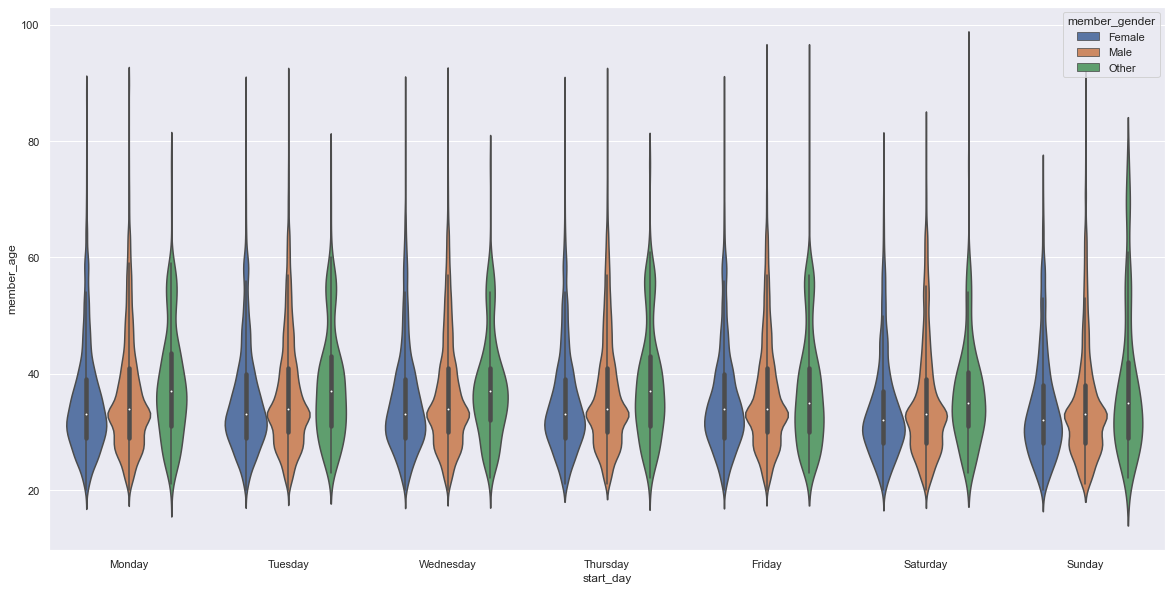

In [58]:
sn.set_theme(style='darkgrid')
plt.figure(figsize=(20,10))
sn.violinplot(data=df, x='start_day', y='member_age', hue='member_gender');


### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
!jupyter nbconvert Part_II_notebook.ipynb --to slides --post serve --no-input --no-prompt